## iPython Widgets

Widgets are a way to interact with plots and code through UI controls.

In [1]:
import ipywidgets as widgets
import numpy as np
from pylab import *

ZMAX = 250 
depth = np.arange(ZMAX*1e03+1)
T_Mantle = 1300.0 

def temp_plot(gradient):
    if gradient == 'normal':
        T_Gradient = T_Mantle/1e05 # Normal geotherm C/km
    else:
        T_Gradient = T_Mantle/(2 * 1e05) # Craton geotherm C/km
        
    T = depth*T_Gradient
    T[T>1300] = 1300
    
    # PLOT
    figure()
    plot(T, -depth/1e03)
    xlabel('Temperature (C)')
    ylabel('Depth (m)')
    title(gradient)
    show()
    
widgets.interact(temp_plot, gradient=['normal', 'craton']);
# this example plots T v depth with a gradient provoded by a drop down list

interactive(children=(Dropdown(description=u'gradient', options=('normal', 'craton'), value='normal'), Output()), _dom_classes=('widget-interact',))

In [2]:
x = np.linspace(0, 2*np.pi)

def plot_sine(amp, period):
    y = amp*np.sin(period*x)
    plot(x, y)
    show()
    
widgets.interact(plot_sine, amp=2, period=2);
# this is a general example of using sliders to alter a graph
# it is also possible to fix one parameter and interact with the other


interactive(children=(IntSlider(value=2, description=u'amp', max=6, min=-2), IntSlider(value=2, description=u'period', max=6, min=-2), Output()), _dom_classes=('widget-interact',))

All the other usual UI elements are easily codeable too like radio buttons, checkboxes etc. Basically anything you can do in a browser. It is also possible to use the returned values from the interactions.

#### Widget Dashboard

Using widgets it also possible to create an interactive dashboard (with links, search fields, buttons etc).  
This could be used as a help feature that sits at the top of the Notebook for all the pracs(Task 3).
If this is used, we can first create a 'Screen Mock Up' that I can use as design to code from.

## Cartopy

Designed for the easy drawing and visualisation of maps using Matplotlib. Seems like this is the industry replacement for Basemaps. 

#### INSTALL
pip install cartopy  
conda install -c scitools cartopy 

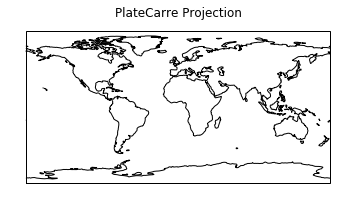

In [3]:
# this set up is added from the snippets menu as the recommended set-up
from __future__ import print_function, division # Python2/3 import that I don't think would be needed with Docker
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook 
# DEBUG: not displaying interactive backend (has though)

import cartopy.crs as ccrs


ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.title("PlateCarre Projection")
plt.show()

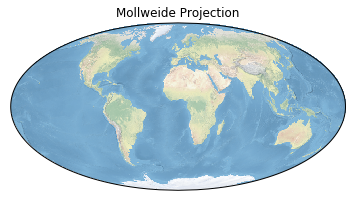

In [4]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.title("Mollweide Projection")
plt.show()

### Full Cartopy Projection List
* PlateCarree
* AlbersEqualArea
* AzimuthalEquidistant
* LambertConformal
* LambertCylindrical
* Mercator
* Miller
* Mollweide
* Orthographic
* Robinson
* Sinusoidal
* Stereographic
* TransverseMercator
* UTM
* InterruptedGoodeHomolosine
* RotatedPole
* OSGB
* EuroPP
* Geostationary
* NearsidePerspective
* Gnomonic
* LambertAzimuthalEqualArea
* NorthPolarStereo
* OSNI
* SouthPolarStereo


## Cartopy Features
Predefined <a href="http://www.naturalearthdata.com/"> Natural Earth </a> datasets for Borders, Coastline, Lakes, Land, Oceans and Rivers. 

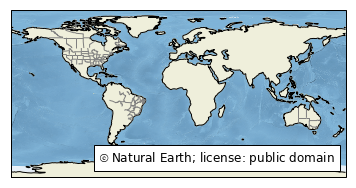

In [5]:
# this example taken from the Cartopy documentation also demonstrates
# adding license info to plots

import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()

## bqplot
This is an excellent plotting library that also incorporates interactive plots easily with ipywidgets where  
each element of a plot is a controllable widget. It can produce animations very easily as well and also offers two different programming paradigms: 1) pyplot Matlab(same as what MAtplotlib does) and 2) Grammar of Graphics style(very intuitive)  
  
#### INSTALL
pip install bqplot  
conda install -c conda-forge bqplot

#### pyplot style

In [6]:
from bqplot import pyplot as plt
plt.figure(1)
np.random.seed(0)
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x,y, axes_options={'y': {'grid_lines': 'dashed'}})
plt.show()

VBox(children=(Figure(axes=[Axis(grid_lines='dashed', orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale())], fig_margin={'top': 60, 'right': 60, 'bottom': 60, 'left': 60}, layout=Layout(min_width=u'125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'y': LinearScale(), 'x': LinearScale()}, scales_metadata={'y': {'orientation': 'vertical', 'dimension': 'y'}, 'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([  0.        ,   0.05025126,   0.10050251,   0.15075377,
         0.20100503,   0.25125628,   0.30150754,   0.35175879,
         0.40201005,   0.45226131,   0.50251256,   0.55276382,
         0.60301508,   0.65326633,   0.70351759,   0.75376884,
         0.8040201 ,   0.85427136,   0.90452261,   0.95477387,
         1.00502513,   1.05527638,   1.10552764,   1.15577889,
         1.20603015,   1.25628141,   1.30653266,   1.35678392,
         1.40703518,   1.45728643,   1.50753769,   1.55778894,
         1.6080402 ,   1.65829146,   1.70854271,   1.75879397,
         1.80904523,   1.85929648,   1.90954774,   1.95979899,
         2.01005025,   2.06030151,   2.11055276,   2.16080402,
         2.21105528,   2.26130653,   2.31155779,   2.36180905,
         2.4120603 ,   2.46231156,   2.51256281,   2.56281407,
         2.61306533,   2.66331658,   2.71356784,   2.7638191 ,
         2.81407035,   2.86432161,   2.91457286,   2.96482412,
         3.01507538,   3.06532663,   3.11557789,   3.16582915,
         3.2160804 ,   3.26633166,   3.31658291,   3.36683417,
         3.41708543,   3.46733668,   3.51758794,   3.5678392 ,
         3.61809045,   3.66834171,   3.71859296,   3.76884422,
         3.81909548,   3.86934673,   3.91959799,   3.96984925,
         4.0201005 ,   4.07035176,   4.12060302,   4.17085427,
         4.22110553,   4.27135678,   4.32160804,   4.3718593 ,
         4.42211055,   4.47236181,   4.52261307,   4.57286432,
         4.62311558,   4.67336683,   4.72361809,   4.77386935,
         4.8241206 ,   4.87437186,   4.92462312,   4.97487437,
         5.02512563,   5.07537688,   5.12562814,   5.1758794 ,
         5.22613065,   5.27638191,   5.32663317,   5.37688442,
         5.42713568,   5.47738693,   5.52763819,   5.57788945,
         5.6281407 ,   5.67839196,   5.72864322,   5.77889447,
         5.82914573,   5.87939698,   5.92964824,   5.9798995 ,
         6.03015075,   6.08040201,   6.13065327,   6.18090452,
         6.23115578,   6.28140704,   6.33165829,   6.38190955,
         6.4321608 ,   6.48241206,   6.53266332,   6.58291457,
         6.63316583,   6.68341709,   6.73366834,   6.7839196 ,
         6.83417085,   6.88442211,   6.93467337,   6.98492462,
         7.03517588,   7.08542714,   7.13567839,   7.18592965,
         7.2361809 ,   7.28643216,   7.33668342,   7.38693467,
         7.43718593,   7.48743719,   7.53768844,   7.5879397 ,
         7.63819095,   7.68844221,   7.73869347,   7.78894472,
         7.83919598,   7.88944724,   7.93969849,   7.98994975,
         8.04020101,   8.09045226,   8.14070352,   8.19095477,
         8.24120603,   8.29145729,   8.34170854,   8.3919598 ,
         8.44221106,   8.49246231,   8.54271357,   8.59296482,
         8.64321608,   8.69346734,   8.74371859,   8.79396985,
         8.84422111,   8.89447236,   8.94472362,   8.99497487,
         9.04522613,   9.09547739,   9.14572864,   9.1959799 ,
         9.24623116,   9.29648241,   9.34673367,   9.39698492,
         9.44723618,   9.49748744,   9.54773869,   9.59798995,
         9.64824121,   9.69849246,   9.74874372,   9.79899497,
         9.84924623,   9.89949749,   9.94974874,  10.        ]), y=array([  1.76405235,   2.16420955,   3.14294754,   5.38384074,
         7.25139873,   6.27412085,   7.22420927,   7.07285206,
         6.96963321,   7.38023171,   7.52427528,   8.97854879,
         9.73958651,   9

#### Grammar of Graphics
This coding style defines  
* A **Figure**: canvas to draw to
* **Scale**: log,linear etc
* **Axis**: with properties
* **Marks**: type of plot eg. Scatter, Histogram
* **Interacts**: the interactive elements to include on the plot

This is a different intuitive approach to scientific computing plotting.

In [7]:
from IPython.display import display
import bqplot as bq

size = 20
np.random.seed(0)

x_data = np.arange(size)

x_ord = bq.OrdinalScale()
y_sc = bq.LinearScale()

bar = bq.Bars(x=x_data, y=np.random.randn(2, size), scales={'x': x_ord, 'y': y_sc},
              type='stacked')
line = bq.Lines(x=x_data, y=np.random.randn(size), scales={'x': x_ord, 'y': y_sc},
                stroke_width=3, colors=['red'], display_legend=True, labels=['Line chart'])

ax_x = bq.Axis(scale=x_ord)
ax_y = bq.Axis(scale=y_sc, orientation='vertical', tick_format='0.2f', grid_lines='solid')

fig = bq.Figure(marks=[bar, line], axes=[ax_x, ax_y])
display(fig)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale(), tick_format=u'0.2f')], fig_margin={'top': 60, 'right': 60, 'bottom': 60, 'left': 60}, layout=Layout(min_width=u'125px'), marks=[Bars(colors=['steelblue'], interactions={'hover': 'tooltip'}, scales={'y': LinearScale(), 'x': OrdinalScale()}, scales_metadata={'y': {'orientation': 'vertical', 'dimension': 'y'}, 'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), y=array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
         0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
         0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275]])), Lines(colors=['red'], display_legend=True, interactions={'hover': 'tooltip'}, labels=[u'Line chart'], scales={'y': LinearScale(), 'x': OrdinalScale()}, scales_metadata={'y': {'orientation': 'vertical', 'dimension': 'y'}, 'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'color': {'dimension': 'color'}}, stroke_width=3.0, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), y=array([-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0))

#### Animation
Example animation (run cell below graph).

In [8]:
xs = bq.LinearScale()
ys = bq.LinearScale()
x = np.arange(100)
y = np.cumsum(np.random.randn(2, 100), axis=1) #two random walks

line = bq.Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red', 'green'])
xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=1000)
display(fig)

Figure(animation_duration=1000, axes=[Axis(label=u'x', scale=LinearScale()), Axis(label=u'y', orientation='vertical', scale=LinearScale(), tick_format=u'0.2f')], fig_margin={'top': 60, 'right': 60, 'bottom': 60, 'left': 60}, layout=Layout(min_width=u'125px'), marks=[Lines(colors=['red', 'green'], interactions={'hover': 'tooltip'}, scales={'y': LinearScale(), 'x': LinearScale()}, scales_metadata={'y': {'orientation': 'vertical', 'dimension': 'y'}, 'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), y=array([[ -6.72460448e-01,  -1.03201361e+00,  -1.84515989e+00,
         -3.57144249e+00,  -3.39401635e+00,  -3.79579729e+00,
         -5.42599563e+00,  -4.96321338e+00,  -5.87051174e+00,
         -5.81856635e+00,  -5.08947579e+00,  -4.96049287e+00,
         -3.82109219e+00,  -5.05591801e+00,  -4.65357637e+00,
         -5.33838646e+00,  -6.20918361e+00,  -6.78803327e+00,
         -7.09958581e+00,  -7.04342046e+00,  -8.20857030e+00,
         -7.30774382e+00,  -6.84208138e+00,  -8.37832506e+00,
         -6.89007287e+00,  -4.99418369e+00,  -3.81540412e+00,
         -3.99532896e+00,  -5.06608158e+00,  -4.01162985e+00,
         -4.41480680e+00,  -3.19236173e+00,  -2.98408675e+00,
         -2.00744772e+00,  -1.65108132e+00,  -9.44508151e-01,
         -9.34008130e-01,   8.51862364e-01,   9.78774457e-01,
          1.38076382e+00,   3.26391452e+00,   1.91615546e+00,
          6.45670458e-01,   1.61506717e+00,   4.41943761e-01,
          2.38556495e+00,   1.97194597e+00,   1.22449115e+00,
          3.14743318e+00,   4.62794797e+00,   6.49550693e+00,
          7.40155159e+00,   6.54032591e+00,   8.45039086e+00,
          8.18238749e+00,   8.98484388e+00,   9.93209585e+00,
          9.77708576e+00,   1.03911651e+01,   1.13133718e+01,
          1.16897973e+01,   1.05903965e+01,   1.08886347e+01,
          1.22150206e+01,   1.15204528e+01,   1.13708182e+01,
          1.09356647e+01,   1.27849284e+01,   1.34572231e+01,
          1.38646850e+01,   1.30947689e+01,   1.36340181e+01,
          1.29596854e+01,   1.29915160e+01,   1.23556699e+01,
          1.30321032e+01,   1.36086940e+01,   1.34003953e+01,
          1.37964020e+01,   1.27033405e+01,   1.12120829e+01,
          1.16514746e+01,   1.18181481e+01,   1.24531795e+01,
          1.48363243e+01,   1.57808038e+01,   1.48679816e+01,
          1.59849978e+01,   1.46690904e+01,   1.42075058e+01,
          1.41392642e+01,   1.58526069e+01,   1.51078521e+01,
          1.42814136e+01,   1.41829611e+01,   1.35194828e+01,
          1.46461187e+01,   1.35661872e+01,   1.24187185e+01,
          1.19808985e+01],
       [ -4.98032451e-01,   1.43149960e+00,   2.38092041e+00,
          2.46847165e+00,   1.24303613e+00,   2.08739911e+00,
          1.08718376e+00,  -4.57587335e-01,   7.30442457e-01,
          1.04738507e+00,   1.96824389e+00,   2.28697155e+00,
          3.14380216e+00,   2.49277656e+00,   1.45853372e+00,
          2.14012824e+00,   1.33671858e+00,   6.47168799e-01,
          1.91636295e-01,   2.09115455e-01,  -1.44878457e-01,
         -1.51982975e+00,  -2.16344815e+00,  -4.38685131e+00,
         -3.76161985e+00,  -5.36367751e+00,  -6.46806085e+00,
         -6.41589577e+00,  -7.15545877e+00,  -5.61244417e+00,
         -6.90530108e+00,  -6.63825021e+00,  -6.67753303e+00,
         -7.84562653e+00,  -7.32234987e+00,  -7.49389620e+00,
         -6.72210565e+00,  -5.89860149e+00,  -3.73536554e+00,
         -2.39883759e+00,  -2.76801943e+00,  -3.00739861e+00,
         -1.90773901e+00,  -1.25247528e+

In [9]:
line.y = np.cumsum(np.random.randn(2, 100), axis=1)

#### Maps with bqplot
I have not fully explored this feature to see if it offers all of the features of Cartopy, just an doco example of usage.

In [10]:
from bqplot import (Figure, Map, Mercator, Orthographic, ColorScale, ColorAxis,
                    AlbersUSA, topo_load, Tooltip)

url = "https://raw.githubusercontent.com/bloomberg/bqplot/master/bqplot/map_data/"

sc_geo = Mercator()
x = Map(scales={'projection': sc_geo})
fig = Figure(marks=[x], title='Basic Map Example')
display(fig)

sc_geo = Mercator()
sc_c1 = ColorScale(scheme='YlOrRd')

map_styles = {'color': {643: 105., 4: 21., 398: 23., 156: 42., 124:78., 76: 98.},
              'scales': {'projection': sc_geo, 'color': sc_c1}}

axis = ColorAxis(scale=sc_c1)

if False:
    try:
        x = Map(map_data=topo_load('map_data/WorldMap.json'), **map_styles)
    except Exception as e:
        print(e)
        import os
        maps = os.path.abspath('WorldMap.json')
        get_url_content_timeout(url + 'WorldMap.json', output=maps)
        tl = topo_load(os.path.abspath("WorldMap.json"))
        x = Map(map_data=tl, **map_styles)

fig = Figure(marks=[x], axes=[axis],title='Choropleth Example')
display(fig)



Figure(fig_margin={'top': 60, 'right': 60, 'bottom': 60, 'left': 60}, layout=Layout(min_width=u'125px'), marks=[Map(hovered_styles={'hovered_stroke_width': 2.0, 'hovered_fill': 'Orange', 'hovered_stroke': None}, interactions={'hover': 'tooltip'}, map_data={u'objects': {u'land': {u'type': u'MultiPolygon', u'arcs': [[[0]], [[1]], [[2]], [[3]], [[4]], [[5]], [[6]], [[7, 8]], [[9, 10]], [[11]], [[12]], [[13]], [[14]], [[15]], [[16]], [[17]], [[18]], [[19]], [[20]], [[21]], [[22]], [[23]], [[24]], [[25]], [[26]], [[27]], [[28, 29]], [[30]], [[31]], [[32]], [[33]], [[34]], [[35]], [[36]], [[37]], [[38]], [[39]], [[40]], [[41, 42]], [[43]], [[44]], [[45]], [[46, 47, 48, 49]], [[50]], [[51]], [[52]], [[53]], [[54]], [[55]], [[56]], [[57]], [[58]], [[59]], [[60]], [[61, 62]], [[63]], [[64]], [[65]], [[66]], [[67]], [[68]], [[69]], [[70]], [[71]], [[72]], [[73]], [[74]], [[75, 76]], [[77]], [[78]], [[79]], [[80]], [[81]], [[82]], [[83]], [[84]], [[85]], [[86]], [[87]], [[88]], [[89, 90]], [[91]], [[92]], [[93]], [[94]], [[95]], [[96]], [[97]], [[98]], [[99]], [[100]], [[101]], [[102]], [[103]], [[104]], [[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]], [[153, 154]], [[155]], [[156]], [[157]], [[158]], [[159]], [[160]], [[161, 162, 163, 164]], [[165]], [[166]], [[167]], [[168]], [[169]], [[170]], [[171]], [[172]], [[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277], [278, 279, 280, 281, 282]], [[283]], [[284]], [[285]], [[286]], [[287]], [[288]], [[289]], [[290]], [[291]], [[292]], [[293]], [[294]], [[295]], [[296]]]}, u'subunits': {u'type': u'GeometryCollection', u'geometries': [{u'arcs': [[297, 298, 299, 300, 301, 302]], u'type': u'Polygon', u'properties': {u'name': u'Afghanistan'}, u'id': 4}, {u'arcs': [[[303, 304, 211, 305]], [[213, 306, 307]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Angola'}, u'id': 24}, {u'arcs': [[308, 248, 309, 310, 311]], u'type': u'Polygon', u'properties': {u'name': u'Albania'}, u'id': 8}, {u'arcs': [[312, 195, 313, 314, 193]], u'type': u'Polygon', u'properties': {u'name': u'United Arab Emirates'}, u'id': 784}, {u'arcs': [[[315, 10]], [[316, 317, 318, 131, 319, 320]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Argentina'}, u'id': 32}, {u'arcs': [[321, 322, 323, 324, 325]], u'type': u'Polygon', u'properties': {u'name': u'Armenia'}, u'id': 51}, {u'arcs': [[[0]], [[1]], [[2]], [[3]], [[4]], [[5]], [[6]], [[326]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Antarctica'}, u'id': 10}, {u'arcs': [[327]], u'type': u'Polygon', u'properties': {u'name': u'French Southern Territories'}, u'id': 260}, {u'arcs': [[[13]], [[23]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Australia'}, u'id': 36}, {u'arcs': [[328, 329, 330, 331, 332, 333, 334]], u'type': u'Polygon', u'properties': {u'name': u'Austria'}, u'id': 40}, {u'arcs': [[[335, -323]], [[282, 336, -326, 337, 338]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Azerbaijan'}, u'id': 31}, {u'arcs': [[339, 340, 341]], u'type': u'Polygon', u'properties': {u'name': u'Burundi'}, u'id': 108}, {u'arcs': [[342, 343, 344, 258, 345]], u'type': u'Polygon', u'properties': {u'name': u'Belgium'}, u'id': 56}, {u'arcs': [[346, 347, 348, 219, 349]], u'type': u'Polygon', u'properties': {u'name': u'Benin'}, u'id': 204}, {u'arcs': [[350, 351, -347, 352, 353, 354]], u'type': u'Polygon',

Figure(axes=[ColorAxis(scale=ColorScale(scheme=u'YlOrRd'))], fig_margin={'top': 60, 'right': 60, 'bottom': 60, 'left': 60}, layout=Layout(min_width=u'125px'), marks=[Map(hovered_styles={'hovered_stroke_width': 2.0, 'hovered_fill': 'Orange', 'hovered_stroke': None}, interactions={'hover': 'tooltip'}, map_data={u'objects': {u'land': {u'type': u'MultiPolygon', u'arcs': [[[0]], [[1]], [[2]], [[3]], [[4]], [[5]], [[6]], [[7, 8]], [[9, 10]], [[11]], [[12]], [[13]], [[14]], [[15]], [[16]], [[17]], [[18]], [[19]], [[20]], [[21]], [[22]], [[23]], [[24]], [[25]], [[26]], [[27]], [[28, 29]], [[30]], [[31]], [[32]], [[33]], [[34]], [[35]], [[36]], [[37]], [[38]], [[39]], [[40]], [[41, 42]], [[43]], [[44]], [[45]], [[46, 47, 48, 49]], [[50]], [[51]], [[52]], [[53]], [[54]], [[55]], [[56]], [[57]], [[58]], [[59]], [[60]], [[61, 62]], [[63]], [[64]], [[65]], [[66]], [[67]], [[68]], [[69]], [[70]], [[71]], [[72]], [[73]], [[74]], [[75, 76]], [[77]], [[78]], [[79]], [[80]], [[81]], [[82]], [[83]], [[84]], [[85]], [[86]], [[87]], [[88]], [[89, 90]], [[91]], [[92]], [[93]], [[94]], [[95]], [[96]], [[97]], [[98]], [[99]], [[100]], [[101]], [[102]], [[103]], [[104]], [[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]], [[153, 154]], [[155]], [[156]], [[157]], [[158]], [[159]], [[160]], [[161, 162, 163, 164]], [[165]], [[166]], [[167]], [[168]], [[169]], [[170]], [[171]], [[172]], [[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277], [278, 279, 280, 281, 282]], [[283]], [[284]], [[285]], [[286]], [[287]], [[288]], [[289]], [[290]], [[291]], [[292]], [[293]], [[294]], [[295]], [[296]]]}, u'subunits': {u'type': u'GeometryCollection', u'geometries': [{u'arcs': [[297, 298, 299, 300, 301, 302]], u'type': u'Polygon', u'properties': {u'name': u'Afghanistan'}, u'id': 4}, {u'arcs': [[[303, 304, 211, 305]], [[213, 306, 307]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Angola'}, u'id': 24}, {u'arcs': [[308, 248, 309, 310, 311]], u'type': u'Polygon', u'properties': {u'name': u'Albania'}, u'id': 8}, {u'arcs': [[312, 195, 313, 314, 193]], u'type': u'Polygon', u'properties': {u'name': u'United Arab Emirates'}, u'id': 784}, {u'arcs': [[[315, 10]], [[316, 317, 318, 131, 319, 320]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Argentina'}, u'id': 32}, {u'arcs': [[321, 322, 323, 324, 325]], u'type': u'Polygon', u'properties': {u'name': u'Armenia'}, u'id': 51}, {u'arcs': [[[0]], [[1]], [[2]], [[3]], [[4]], [[5]], [[6]], [[326]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Antarctica'}, u'id': 10}, {u'arcs': [[327]], u'type': u'Polygon', u'properties': {u'name': u'French Southern Territories'}, u'id': 260}, {u'arcs': [[[13]], [[23]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Australia'}, u'id': 36}, {u'arcs': [[328, 329, 330, 331, 332, 333, 334]], u'type': u'Polygon', u'properties': {u'name': u'Austria'}, u'id': 40}, {u'arcs': [[[335, -323]], [[282, 336, -326, 337, 338]]], u'type': u'MultiPolygon', u'properties': {u'name': u'Azerbaijan'}, u'id': 31}, {u'arcs': [[339, 340, 341]], u'type': u'Polygon', u'properties': {u'name': u'Burundi'}, u'id': 108}, {u'arcs': [[342, 343, 344, 258, 345]], u'type': u'Polygon', u'properties': {u'name': u'Belgium'}, u'id': 56}, {u'arcs': [[346, 347, 348, 219, 349]], u'type': u'Polygon', u'properties': {u'name': u'Benin'}, u'id': 204}, {u'arcs': [

* Can also add **tooltips** to plots easily (on hover), do **detailed longer animations** and cool data analysis stuff including regression plots that allow you to move a point and have the **regression line updated**. (happy to prototype any of these on next Sprint)

## Vega
Vega is a declarative visualisation grammar that uses JSON. A very different approach to plots that essentially uses no coding just JSON definitions.  
  
#### INSTALL
pip install vega  
conda install -c conda-forge vega 

In [11]:
from vega import Vega

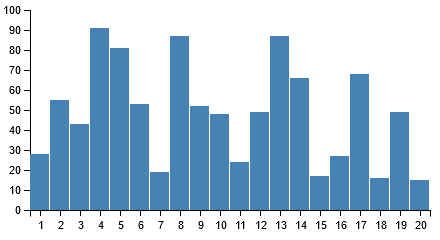

In [12]:
Vega({
  "width": 400,
  "height": 200,
  "padding": {"top": 10, "left": 30, "bottom": 30, "right": 10},
  "data": [
    {
      "name": "table",
      "values": [
        {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
        {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
        {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
        {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
        {"x": 9,  "y": 52}, {"x": 10, "y": 48},
        {"x": 11, "y": 24}, {"x": 12, "y": 49},
        {"x": 13, "y": 87}, {"x": 14, "y": 66},
        {"x": 15, "y": 17}, {"x": 16, "y": 27},
        {"x": 17, "y": 68}, {"x": 18, "y": 16},
        {"x": 19, "y": 49}, {"x": 20, "y": 15}
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "ordinal",
      "range": "width",
      "domain": {"data": "table", "field": "x"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "domain": {"data": "table", "field": "y"},
      "nice": True
    }
  ],
  "axes": [
    {"type": "x", "scale": "x"},
    {"type": "y", "scale": "y"}
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "table"},
      "properties": {
        "enter": {
          "x": {"scale": "x", "field": "x"},
          "width": {"scale": "x", "band": True, "offset": -1},
          "y": {"scale": "y", "field": "y"},
          "y2": {"scale": "y", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": { "fill": {"value": "red"} } } } ] })